In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io
import seaborn as sns

%matplotlib inline

# EFTP: analysis of $\|F(x^{k+1})\|^2 + 2\|F(x^{k+1}) - F(\widetilde{x}^{k})\|^2 \leq \|F(x^{k})\|^2 + 2\|F(x^{k}) - F(\widetilde{x}^{k-1})\|^2$

## $L = 1, \mu = 0$

In [141]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 3
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_key_ineq_idea_10_dist_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and (i!=2) and (i-j <= 2) and (j!=0):
            if (i == 2*N_max+1):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if (i == 2*N_max+1):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

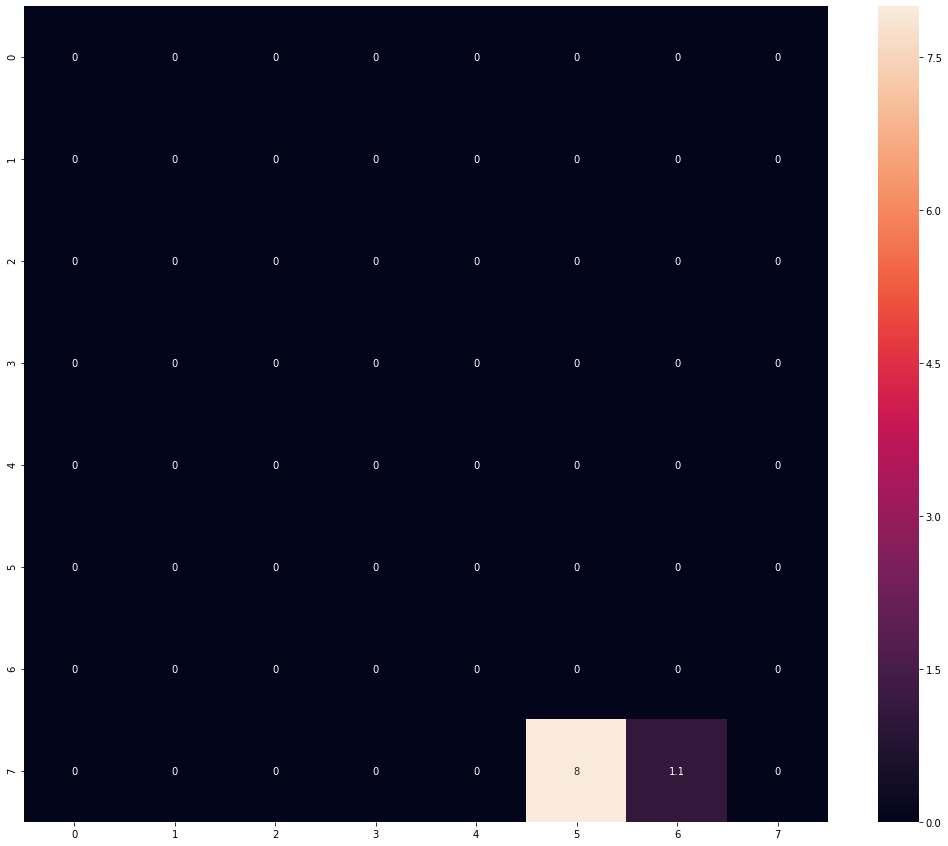

In [142]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

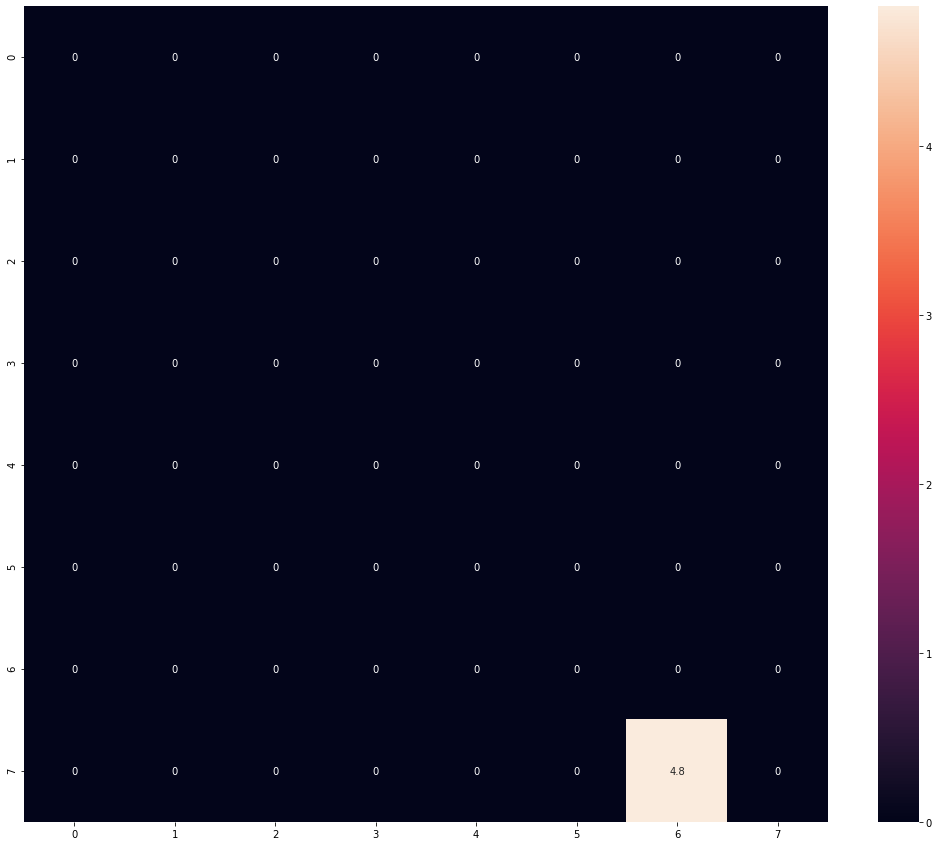

In [143]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [132]:
Lipschitzness_weights_matrix/Lipschitzness_weights_matrix[6,5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [122]:
monotonicity_weights_matrix/Lipschitzness_weights_matrix[4,3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.54104811, 0.29759819, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [125]:
L = 1.0
gamma = 1.0/(3*L)
N_max = 2
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_key_ineq_idea_10_dist_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+3):
    for j in np.arange(0, i):
        if (i!=j) and (i!=2) and (i-j <= 2) and (j!=0):
            if (i == 2*N_max):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if (i == 2*N_max):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

In [126]:
Lipschitzness_weights_matrix/Lipschitzness_weights_matrix[4,3]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [127]:
monotonicity_weights_matrix/Lipschitzness_weights_matrix[4,3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.54104811, 0.29759819, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [115]:
L = 1.0
gamma = 1.0/(3*L)
N_max = 2
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_key_ineq_idea_10_dist_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+3):
    for j in np.arange(0, i):
        if (i!=j) and (i!=2) and (i-j <= 2) and (j!=0):
            if (i == 2*N_max):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if (i == 2*N_max):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

In [116]:
Lipschitzness_weights_matrix

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 3.89331, 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ]])

In [117]:
monotonicity_weights_matrix*1.0/gamma

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 17.999334,  3.475926,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ]])

In [109]:
L = 1.0
gamma = 1.0/(6*L)
N_max = 2
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_key_ineq_idea_10_dist_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+3, 2*N_max+3))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+3):
    for j in np.arange(0, i):
        if (i!=j) and (i!=2) and (i-j <= 2) and (j!=0):
            if (i == 2*N_max):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if (i == 2*N_max):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

In [110]:
Lipschitzness_weights_matrix

array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 5.424339, 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      ]])

In [111]:
monotonicity_weights_matrix

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 11.999666,  3.525243,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ]])